# HANDWRITTEN NUMBERS RECOGNITION NEURAL NETWORK

In [1]:
import numpy
import scipy.special #expit() for sigmoid function
import matplotlib.pyplot
%matplotlib inline 

input_nodes = 28*28
hidden_nodes = 200
output_nodes = 10
learning_rate = 0.0394

class neuralNetwork:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        #More sofisticated way of initialising weights inside wih and who matrices (normal distribution involved)
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        self.lr = learningrate
        self.activation_function = lambda x: scipy.special.expit(x)
        pass
    def train(self, inputs_list, targets_list):
        #conver inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        #calculate sum and weight multiplication of inputs
        hidden_inputs = numpy.dot(self.wih, inputs);
        
        #calculate the emerging signals from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #repeating the process for last 2 layers
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        #ERROR BACKPROPAGATION
        output_errors = targets - final_outputs
        #hidden_errors = houtput_weights.T * errors_output
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        #WEIGHT UPDATE j-k
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        #WEIGHT UPDATE i-j
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1 - hidden_outputs)), numpy.transpose(inputs))
        pass
    def query(self, inputs_list):
        #conver inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        #calculate sum and weight multiplication of inputs
        hidden_inputs = numpy.dot(self.wih, inputs);
        
        #calculate the emerging signals from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #repeating the process for last 2 layers
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
        pass
    
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# N-NET TRAINING
## 5 epoch | 200 hidden nodes | 0.1 learning rate | 60k examples

In [2]:
data_file = open("../../mnist_dataset/mnist_train_60k.csv",'r')
training_data_list = data_file.readlines()
data_file.close()

epochs = 4 

for e in range(epochs):
    for record in training_data_list:
        all_values = record.split(',')
        inputs = ((numpy.asfarray(all_values[1:])) / 255.0 * 0.99) + 0.01
        targets = numpy.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    print("epoch",e+1)
    pass
print("Done")

epoch 1
epoch 2
epoch 3
epoch 4
Done


# N-NET TEST
## 10k tests

In [2]:
test_data_file = open("../../mnist_dataset/mnist_test_10k.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

scorecard = []

for record in test_data_list:
    all_values = record.split(',')
    
    correct_label = int(all_values[0])
    
    inputs = ((numpy.asfarray(all_values[1:])) / 255.0 * 0.99) + 0.01
    outputs = n.query(inputs)
    label = numpy.argmax(outputs)
    
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass
scorecard_array = numpy.asarray(scorecard)
print("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.1061


# OWN HANDWRITING TEST

[[0.96801892]
 [0.00181799]
 [0.42622961]
 [0.71415155]
 [0.29003517]
 [0.07091588]
 [0.93524788]
 [0.02479191]
 [0.03044214]
 [0.10284456]]
Network's answer: 0


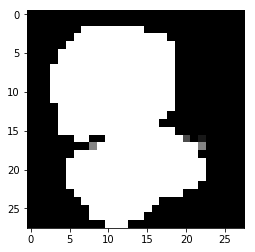

In [3]:
import imageio

image_file_name = "digit.png"
img_array = imageio.imread(image_file_name, as_gray=True)
img_array.flatten()
img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01
inputs = img_data
outputs = n.query(inputs)
label = numpy.argmax(outputs)

print(outputs)
matplotlib.pyplot.imshow(img_array, cmap="Greys", interpolation="None")
print("Network's answer:",label)

# EXTENSIVE RESEARCH & PLOTTING

In [ ]:
# import matplotlib.pyplot as plt
import datetime

test_data_file = open("../../mnist_dataset/mnist_test_10k.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

data_file = open("../../mnist_dataset/mnist_train_60k.csv",'r')
training_data_list = data_file.readlines()
data_file.close()

scorecard = []
lrates = []
performanceArray = []

epochs = 8
iterations = 50

initialLr = 0.01
finalLr = 0.5
lrIncrement = (finalLr - initialLr) / iterations

n.lr = initialLr
print("Initial vs final learning rate:",initialLr,"vs",finalLr)
print("Iterations:",iterations)
print("Epochs:",epochs)
print("Started at",datetime.datetime.now())
for i in range(iterations):
    #TRAIN
    for e in range(epochs):
        for record in training_data_list:
            all_values = record.split(',')
            inputs = ((numpy.asfarray(all_values[1:])) / 255.0 * 0.99) + 0.01
            targets = numpy.zeros(output_nodes) + 0.01
            targets[int(all_values[0])] = 0.99
            n.train(inputs, targets)
            pass
        pass
    #TEST
    for record in test_data_list:
        all_values = record.split(',')
        correct_label = int(all_values[0])
        inputs = ((numpy.asfarray(all_values[1:])) / 255.0 * 0.99) + 0.01
        outputs = n.query(inputs)
        label = numpy.argmax(outputs)

        if (label == correct_label):
            scorecard.append(1)
        else:
            scorecard.append(0)
            pass
        pass
    scorecard_array = numpy.asarray(scorecard)
    lrates.append(n.lr)
    performanceArray.append(scorecard_array.sum() / scorecard_array.size)
    n.lr += lrIncrement
    print("Iteration",i+1,"completed successfully at",e+1,"epochs",datetime.datetime.now())
    print("Data",i+1,": learning rate=",lrates[i],"performance:",performanceArray[i])
    pass
print("Highest performance achieved=",performanceArray[numpy.argmax(performanceArray)],"at lr=",lrates[numpy.argmax(performanceArray)])
print("Report finished on",datetime.datetime.now())

Initial vs final learning rate: 0.01 vs 0.5
Iterations: 50
Epochs: 8
Started at 2018-11-15 14:23:51.967847
Iteration 1 completed successfully at 8 epochs 2018-11-15 14:34:48.165482
Data 1 : learning rate= 0.01 performance: 0.9678
Iteration 2 completed successfully at 8 epochs 2018-11-15 14:45:18.465285
Data 2 : learning rate= 0.019799999999999998 performance: 0.9723
Iteration 3 completed successfully at 8 epochs 2018-11-15 14:55:47.757273
Data 3 : learning rate= 0.029599999999999998 performance: 0.9738
Iteration 4 completed successfully at 8 epochs 2018-11-15 15:06:18.402178
Data 4 : learning rate= 0.0394 performance: 0.97435
Iteration 5 completed successfully at 8 epochs 2018-11-15 15:16:48.999266
Data 5 : learning rate= 0.049199999999999994 performance: 0.97342
Iteration 6 completed successfully at 8 epochs 2018-11-15 15:27:18.518560
Data 6 : learning rate= 0.059 performance: 0.9723833333333334
Iteration 7 completed successfully at 8 epochs 2018-11-15 15:37:45.991337
Data 7 : learnin

In [4]:
plt.title("Most efficient learning rate at 8 epochs")
plt.ylabel("efficiency")
plt.xlabel("learning rate")
plt.plot(lrates, performanceArray, "b")
plt.grid(True)
plt.show()
print("Highest performance achieved=",performanceArray[numpy.argmax(performanceArray)],"at lr=",lrates[numpy.argmax(performanceArray)])

NameError: name 'plt' is not defined